# Pembuatan AI penyelesai permainan katla menggunakan Shannon Entropy

### Mengambil semua kata 5 huruf dari semua kata di kbbi


In [1]:
import urllib.request
import re
import time

# Define the regular expression pattern to match 5-letter words consisting of letters only
pattern = re.compile(r'^[a-zA-Z]{5}$')

# List to store the 5-letter words
kosakata = []

# Loop through each letter of the alphabet
for i in 'abcdefghijklmnopqrstuvwxyz':
    url = "https://raw.githubusercontent.com/bekicot/indonesian_words/master/words/{}".format(i)
    txt_file = urllib.request.urlopen(url)
    time.sleep(1)

    for line in txt_file:
        kata = line.decode("utf-8").strip()
        if pattern.match(kata):
            kosakata.append(kata.lower())  # Convert word to lowercase

# Write the lowercase 5-letter words to a text file
with open('katla_newWords.txt', 'w') as file:
    for word in kosakata:
        file.write(word + '\n')


#### total kata di dataset yang digunakan

In [1]:
# count all word in wordle_indonesia.txt
count = 0
with open('katla_newWords.txt', 'r') as f:
    #for every line in file
    for line in f:
        #split the line into words
        words = line.split()
        #increase count by number of words in line
        count += len(words)

print('jumlah kata : ', count)


jumlah kata :  6892


### Penebakan warna

In [1]:
def wordle_result(guess_word, final_word):
    result = []
    guess_letters = list(guess_word)
    final_letters = list(final_word)

    # Iterate through each letter in the guess word
    already_yellow = []
    for i in range(len(guess_word)):
        guess_letter = guess_letters[i]

        if guess_letter == final_letters[i]:
            result.append('g')  # Letter in the same place as the result
        elif guess_letter in final_letters:
            match_found = True

            count_guess = guess_letters.count(guess_letter)
            count_final = final_letters.count(guess_letter)
            for y in range(len(final_letters)):
                if final_letters[y] == guess_letter and guess_letters[y] != guess_letter:
                    if guess_letter in already_yellow and count_guess > count_final:
                        match_found = True
                        break
                    else:
                        result.append('y')  # Letter appears more in the guess word, mark as '-'
                        already_yellow.append(guess_letter)
                        match_found = False
                        break
            if match_found:
                result.append('-')  # Letter appears in a different place
        else:
            result.append('-')  # Letter not in the final word

    # Turn result into a string
    result = ''.join(result)
    return result

guess_word = input("masukkan guess word: ")
final_word = input("masukkan final word: ")
answer = wordle_result(guess_word, final_word)
print ("kata tebakan : ", guess_word)
print ("kata rahasia : ", final_word)
print("kombinasi warna: ", answer)

kata tebakan :  mobil
kata rahasia :  mules
kombinasi warna:  g---y


### Distribusi jawaban per huruf

In [11]:
def wordle_result(guess_word, final_word):
    result = []
    guess_letters = list(guess_word)
    final_letters = list(final_word)

    # Iterate through each letter in the guess word
    already_yellow = []
    for i in range(len(guess_word)):
        guess_letter = guess_letters[i]

        if guess_letter == final_letters[i]:
            result.append('g')  # Letter in the same place as the result
        elif guess_letter in final_letters:
            match_found = True

            count_guess = guess_letters.count(guess_letter)
            count_final = final_letters.count(guess_letter)
            for y in range(len(final_letters)):
                if final_letters[y] == guess_letter and guess_letters[y] != guess_letter:
                    if guess_letter in already_yellow and count_guess > count_final:
                        match_found = True
                        break
                    else:
                        result.append('y')  # Letter appears more in the guess word, mark as '-'
                        already_yellow.append(guess_letter)
                        match_found = False
                        break
            if match_found:
                result.append('-')  # Letter appears in a different place
        else:
            result.append('-')  # Letter not in the final word

    return tuple(result)


results_count = {}
total_count = 0
guess_word = input ('Masukkan guess word : ')

with open('katla_newWords.txt', 'r') as inner_file:
    for line in inner_file:
        final_word = line.strip()
        result = wordle_result(guess_word, final_word)

        # Update the count for each result array
        if result in results_count:
            results_count[result] += 1
        else:
            results_count[result] = 1

        total_count += 1

# Print all the results and their counts
for result, count in results_count.items():
    print(f"Result: {result} - Count: {count}")


Result: ('-', '-', 'y', '-', '-') - Count: 191
Result: ('g', 'g', 'g', '-', '-') - Count: 9
Result: ('-', 'g', '-', '-', 'g') - Count: 103
Result: ('-', '-', 'y', 'y', '-') - Count: 67
Result: ('-', 'y', '-', '-', 'y') - Count: 175
Result: ('-', '-', '-', '-', 'y') - Count: 113
Result: ('y', 'y', 'y', '-', '-') - Count: 36
Result: ('-', 'g', 'y', 'g', '-') - Count: 39
Result: ('y', 'y', '-', '-', 'y') - Count: 43
Result: ('-', 'y', '-', '-', '-') - Count: 566
Result: ('y', 'g', '-', '-', '-') - Count: 139
Result: ('-', '-', '-', '-', 'g') - Count: 189
Result: ('-', 'y', '-', 'y', '-') - Count: 288
Result: ('y', 'g', 'y', '-', '-') - Count: 31
Result: ('g', '-', '-', '-', '-') - Count: 49
Result: ('-', '-', '-', 'g', 'g') - Count: 73
Result: ('-', 'y', 'g', '-', '-') - Count: 114
Result: ('-', 'g', '-', 'g', '-') - Count: 104
Result: ('-', 'y', '-', 'y', 'g') - Count: 28
Result: ('-', 'y', '-', '-', 'g') - Count: 122
Result: ('g', 'y', '-', 'y', 'y') - Count: 6
Result: ('-', '-', '-', '

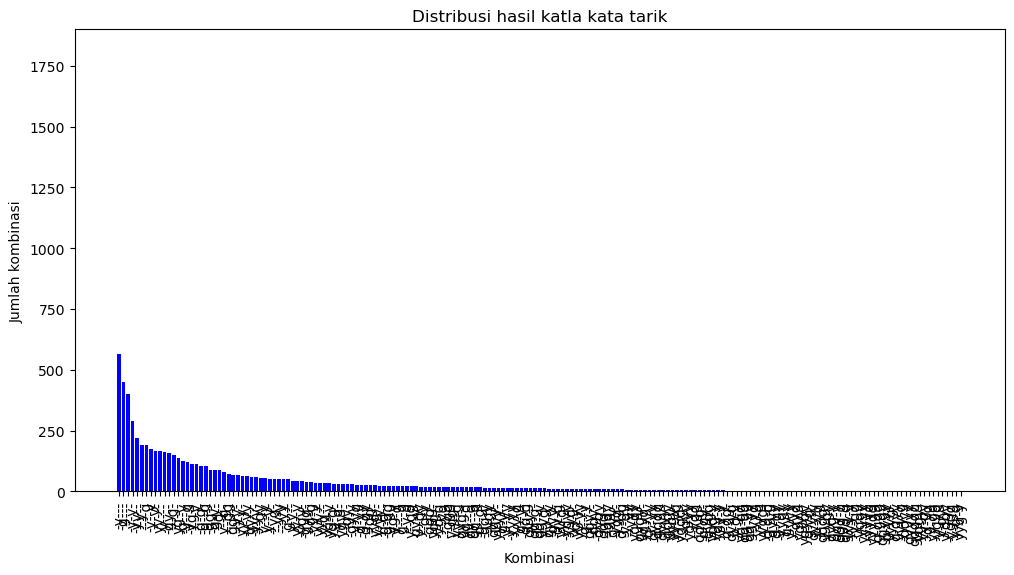

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Convert the count_result dictionary into separate arrays for combination and count
combinations = []
counts = []

for combination, count in results_count.items():
    combinations.append("".join(combination))
    counts.append(count)

# Sort the combinations and counts in descending order based on the counts
sorted_indices = np.argsort(counts)[::-1]
combinations = np.array(combinations)[sorted_indices]
counts = np.array(counts)[sorted_indices]


# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(combinations, counts)
plt.bar(combinations, counts, color='blue')

# Set the Y-axis limit to 500
plt.ylim(0, 1900)

title = 'Distribusi hasil katla kata ' + guess_word

# Customize the plot
plt.xlabel("Kombinasi")
plt.ylabel("Jumlah kombinasi")
plt.title(title)
plt.xticks(rotation=90)

# Display the plot
plt.show()


### Pencarian kata dengan entropi tertinggi

In [4]:
import math

def wordle_result(guess_word, final_word):
    result = []
    guess_letters = list(guess_word)
    final_letters = list(final_word)

    # Iterate through each letter in the guess word
    already_yellow = []
    for i in range(len(guess_word)):
        guess_letter = guess_letters[i]

        if guess_letter == final_letters[i]:
            result.append('g')  # Letter in the same place as the result
        elif guess_letter in final_letters:
            match_found = True

            count_guess = guess_letters.count(guess_letter)
            count_final = final_letters.count(guess_letter)
            for y in range(len(final_letters)):
                if final_letters[y] == guess_letter and guess_letters[y] != guess_letter:
                    if guess_letter in already_yellow and count_guess > count_final:
                        match_found = True
                        break
                    else:
                        result.append('y')  # Letter appears more in the guess word, mark as '-'
                        already_yellow.append(guess_letter)
                        match_found = False
                        break
            if match_found:
                result.append('-')  # Letter appears in a different place
        else:
            result.append('-')  # Letter not in the final word

    return result

# Open the wordle_indonesia.txt file
with open('katla_allwords.txt', 'r') as file:
    word_scores = []

    for guess_word in file:
        guess_word = guess_word.strip()
        results_count = {}
        total_count = 0

        # Open the wordle_indonesia.txt file again to process each final word
        with open('katla_allwords.txt', 'r') as inner_file:
            for line in inner_file:
                final_word = line.strip()
                result = tuple(wordle_result(guess_word, final_word))

                # Update the count for each result array
                if result in results_count:
                    results_count[result] += 1
                else:
                    results_count[result] = 1

                total_count += 1

        entropy_total = 0

        # Calculate the probability multiplied by log(1/probability) for each result array
        for result, count in results_count.items():
            probability = count / total_count
            log_probability = math.log2(1 / probability)
            entropy = probability * log_probability
            entropy_total += entropy

        word_scores.append((guess_word, entropy_total))

    # Sort the word scores in descending order based on entropy_total
    word_scores.sort(key=lambda x: x[1], reverse=True)

    # Print the top 10 words with the highest entropy_total
    for word, entropy_total in word_scores[:10]:
        print(f'{word}: {entropy_total}')

tarik: 6.084948621821001
kiras: 6.047780225159484
kasir: 6.032367368677726
kerat: 6.031660063867585
takir: 6.030205558142956
sarit: 6.026749973204459
tikar: 6.018523638951996
serak: 6.0122259303249805
karut: 6.012037249950024
kurai: 6.008862737735457


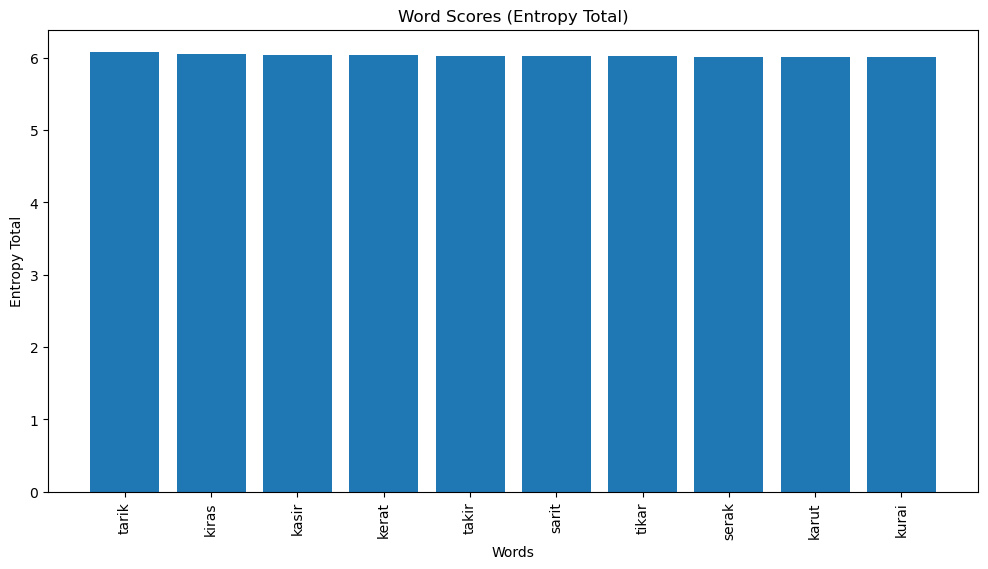

In [13]:
import matplotlib.pyplot as plt

# Extract the words and entropy scores from word_scores
words = [word for word, _ in word_scores]
entropy_scores = [entropy for _, entropy in word_scores]

words = [word for word, _ in word_scores[:10]]
entropy_scores = [entropy for _, entropy in word_scores[:10]]

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(words, entropy_scores)

# Customize the plot
plt.xlabel("Words")
plt.ylabel("Entropy Total")
plt.title("Word Scores (Entropy Total)")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


### Katla AI test

In [8]:
import math

eligible_words = []

def wordle_result(guess_word, final_word):
    result = []
    guess_letters = list(guess_word)
    final_letters = list(final_word)

    # Iterate through each letter in the guess word
    already_yellow = []
    for i in range(len(guess_word)):
        guess_letter = guess_letters[i]

        if guess_letter == final_letters[i]:
            result.append('g')  # Letter in the same place as the result
        elif guess_letter in final_letters:
            match_found = True

            count_guess = guess_letters.count(guess_letter)
            count_final = final_letters.count(guess_letter)
            for y in range(len(final_letters)):
                if final_letters[y] == guess_letter and guess_letters[y] != guess_letter:
                    if guess_letter in already_yellow and count_guess > count_final:
                        match_found = True
                        break
                    else:
                        result.append('y')  # Letter appears more in the guess word, mark as '-'
                        already_yellow.append(guess_letter)
                        match_found = False
                        break
            if match_found:
                result.append('-')  # Letter appears in a different place
        else:
            result.append('-')  # Letter not in the final word

    # Turn result into a string
    result = ''.join(result)
    return result


def calculate_entropy(guess_word):
    results_count = {}
    total_count = len(eligible_words)

    for final_word in eligible_words:
        result = wordle_result(guess_word, final_word)

        if result in results_count:
            results_count[result] += 1
        else:
            results_count[result] = 1

    entropy_total = 0

    for result, count in results_count.items():
        probability = count / total_count
        entropy = probability * math.log2(1/probability)
        entropy_total += entropy

    return entropy_total


def find_top_entropy_words(guess_word, combination):
    new_eligible = []

    for final_word in eligible_words:
        result = wordle_result(guess_word, final_word)

        # Update the count for each result array
        if result == combination:
            # Insert into new_eligible
            new_eligible.append(final_word)

    # Clear eligible_words and replace it with new_eligible
    eligible_words.clear()
    eligible_words.extend(new_eligible)

    word_scores = []

    for word in eligible_words:
        entropy_total = calculate_entropy(word)
        word_scores.append((word, entropy_total))

    # Sort the word scores in descending order based on entropy_total
    word_scores.sort(key=lambda x: x[1], reverse=True)

    # Return the top 10 eligible words with their entropy scores and updated eligible_words
    return word_scores[:5]


# Example usage:
with open('wordle_indonesia.txt', 'r') as file:
    eligible_words = [line.strip() for line in file]
    all_words = [line.strip() for line in file]

loop_count = 0

while True:
    loop_count += 1
    guess_word = input("Masukkan kata tebakan: ")
    combination = input("Masukkan kombinasi warna: ")

    print(guess_word,' -> ', combination)

    if combination == 'ggggg':
        print("You win!")
        break

    top_entropy_words = find_top_entropy_words(guess_word, combination)

    if not top_entropy_words:
        print("Kombinasi tidak ditemukan.")
        break
    else:
        # Print the top 10 eligible words with their entropy scores
        for word, entropy_total in top_entropy_words:
            print(f'{word}: {entropy_total}')

    print()  # Add a new line for separation

print(f"Jumlah Percobaan: {loop_count}")

lunas: 5.2005827448282655
senam: 5.199608628763613
sepan: 5.075416637884201
sulam: 5.028899366754316
sedan: 5.020843929076746

You win!
Jumlah Percobaan: 2


### simulasi permainan katla 
#### semua huruf di dataset menjadi kata rahasia dan kaat tebaknya 10 kata dengan entropi tertinggi

In [1]:
import math

eligible_words = []

def wordle_result(guess_word, final_word):
    result = []
    guess_letters = list(guess_word)
    final_letters = list(final_word)

    # Iterate through each letter in the guess word
    already_yellow = []
    for i in range(len(guess_word)):
        guess_letter = guess_letters[i]

        if guess_letter == final_letters[i]:
            result.append('g')  # Letter in the same place as the result
        elif guess_letter in final_letters:
            match_found = True

            count_guess = guess_letters.count(guess_letter)
            count_final = final_letters.count(guess_letter)
            for y in range(len(final_letters)):
                if final_letters[y] == guess_letter and guess_letters[y] != guess_letter:
                    if guess_letter in already_yellow and count_guess > count_final:
                        match_found = True
                        break
                    else:
                        result.append('y')  # Letter appears more in the guess word, mark as '-'
                        already_yellow.append(guess_letter)
                        match_found = False
                        break
            if match_found:
                result.append('-')  # Letter appears in a different place
        else:
            result.append('-')  # Letter not in the final word

    # Turn result into a string
    result = ''.join(result)
    return result


def calculate_entropy(guess_word):
    results_count = {}
    total_count = len(eligible_words)

    for final_word in eligible_words:
        result = wordle_result(guess_word, final_word)

        if result in results_count:
            results_count[result] += 1
        else:
            results_count[result] = 1

    entropy_total = 0

    for result, count in results_count.items():
        probability = count / total_count
        entropy = -probability * math.log2(probability)
        entropy_total += entropy

    return entropy_total


def find_top_entropy_words(guess_word, combination):
    new_eligible = []

    for final_word in eligible_words:
        result = wordle_result(guess_word, final_word)

        # Update the count for each result array
        if result == combination:
            # Insert into new_eligible
            new_eligible.append(final_word)

    # Clear eligible_words and replace it with new_eligible
    eligible_words.clear()
    eligible_words.extend(new_eligible)

    word_scores = []

    for word in eligible_words:
        entropy_total = calculate_entropy(word)
        word_scores.append((word, entropy_total))

    # Sort the word scores in descending order based on entropy_total
    word_scores.sort(key=lambda x: x[1], reverse=True)

    # Return the top 10 eligible words with their entropy scores and updated eligible_words
    return word_scores[:1]


# Example usage:
guess_array = ['sarik', 'karis', 'tarik', 'katir', 'kiras', 'kasir', 'kitar', 'sarit', 'kisar', 'kurai']

for best_words in guess_array:
    total_tries = 0
    total_loop = 0
    lost_count = 0
    count_1 = 0
    count_2 = 0
    count_3 = 0
    count_4 = 0
    count_5 = 0
    count_6 = 0

    with open('katla_allwords.txt', 'r') as file:
        final_arr = [line.strip() for line in file]

    for final_word in final_arr:
        guess_word = best_words
        loop_count = 0
        with open('katla_allwords.txt', 'r') as file:
            eligible_words = [line.strip() for line in file]

        loop_count += 1
        combination = wordle_result(guess_word, final_word)
        find_top_entropy_words(guess_word, combination)
        if combination == 'ggggg':
            print(best_words, " -> ", final_word)
        else:
            top_entropy_words = find_top_entropy_words(guess_word, combination)
            for word, entropy_total in top_entropy_words:
                guess_word = word
            while True:
                loop_count += 1
                combination = wordle_result(guess_word, final_word)

                if combination == 'ggggg':
                    break

                top_entropy_words = find_top_entropy_words(guess_word, combination)

                if not top_entropy_words:
                    break
                else:
                    for word, entropy_total in top_entropy_words:
                        guess_word = word
                

        if loop_count == 1:
            count_1 += 1
        if loop_count == 2:
            count_2 += 1
        if loop_count == 3:
            count_3 += 1
        if loop_count == 4:
            count_4 += 1
        if loop_count == 5:
            count_5 += 1
        if loop_count == 6:
            count_6 += 1
        if loop_count > 6: 
            lost_count += 1
        total_loop += loop_count
        total_tries += 1

    avg_loop = total_loop/total_tries
    print(best_words, " = ", avg_loop)
    print("lost = ", lost_count)

    win_rate = 1-(lost_count/1473)
    with open('wordleSimulationResult.txt', 'a') as file:
        file.write(f"{best_words}: {avg_loop}\n")
        file.write(f"lost: {lost_count}\n")
        file.write(f"win rate: {win_rate}\n")
        file.write(f"1st try: {count_1}\n")
        file.write(f"2nd try: {count_2}\n")
        file.write(f"3rd try: {count_3}\n")
        file.write(f"4th try: {count_4}\n")
        file.write(f"5th try: {count_5}\n")
        file.write(f"6th try: {count_6}\n")

sarik  =  3.9099447513812153
lost =  103


KeyboardInterrupt: 

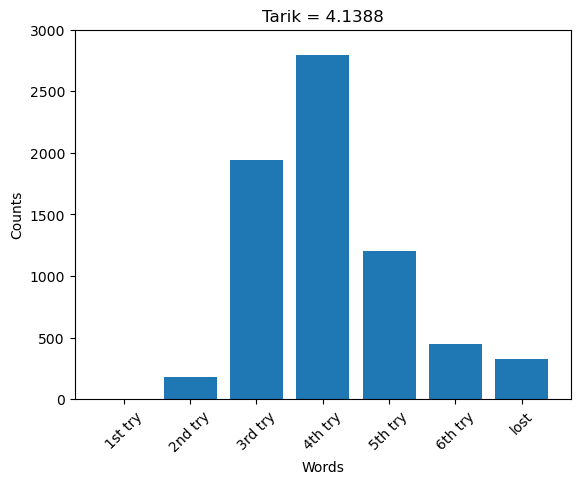

In [1]:
import matplotlib.pyplot as plt
# Data
# tarik  =  4.138856645385955
# lost =  325
# win rate =  0.9528438769587928
# 1st try =  1
# 2nd try =  184
# 3rd try =  1945
# 4th try =  2790
# 5th try =  1199
# 6th try =  448
words = ['1st try', '2nd try', '3rd try', '4th try', '5th try', '6th try','lost']
counts = [1, 184, 1945, 2790, 1199, 448, 325]

# Plotting
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Tarik = 4.1388')
plt.xticks(rotation=45)
plt.ylim(0, 3000)
plt.show()


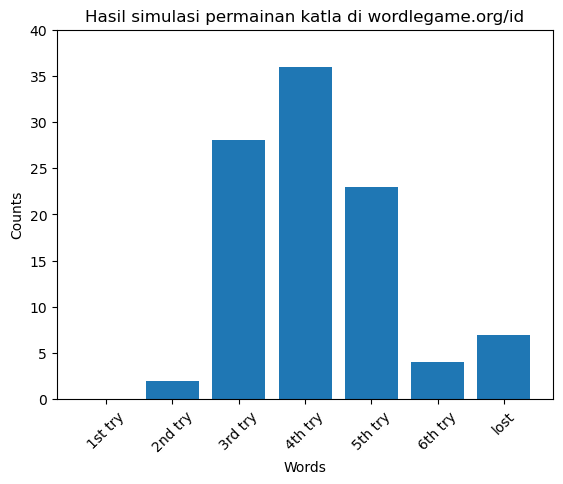

In [2]:
import matplotlib.pyplot as plt
#data
# lost: 7
# Avg Loop: 4.16
# win rate: 0.9299999999999999
# 1st try: 0
# 2nd try: 2
# 3rd try: 28
# 4th try: 36
# 5th try: 23
# 6th try: 4

words = ['1st try', '2nd try', '3rd try', '4th try', '5th try', '6th try','lost']
counts = [0, 2, 28, 36, 23, 4, 7]

# Plotting
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Hasil simulasi permainan katla di wordlegame.org/id')
plt.xticks(rotation=45)
plt.ylim(0, 40)
plt.show()

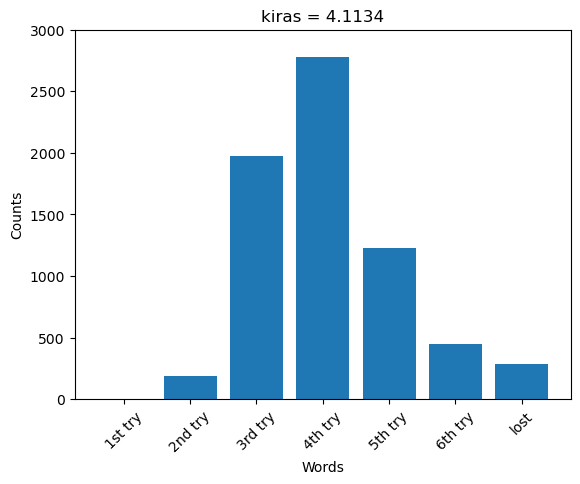

In [6]:
# kiras  =  4.113464886825304
# lost =  283
# win rate =  0.9589378990133488
# 1st try =  1
# 2nd try =  185
# 3rd try =  1970
# 4th try =  2775
# 5th try =  1231
# 6th try =  447
# jumlah kata =  6892

words = ['1st try', '2nd try', '3rd try', '4th try', '5th try', '6th try','lost']
counts = [1, 185, 1970, 2775, 1231, 447, 283]

# Plotting
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('kiras = 4.1134')
plt.xticks(rotation=45)
plt.ylim(0, 3000)
plt.show()

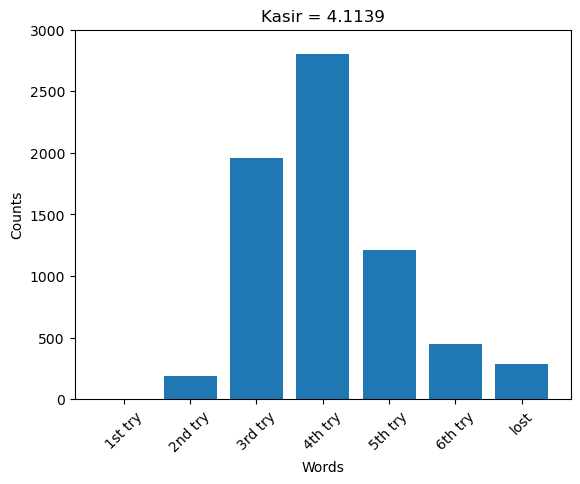

In [8]:
# kasir  =  4.1139001741149155
# lost =  285
# win rate =  0.9586477074869414
# 1st try =  1
# 2nd try =  186
# 3rd try =  1956
# 4th try =  2803
# 5th try =  1211
# 6th try =  450
# jumlah kata =  6892

words = ['1st try', '2nd try', '3rd try', '4th try', '5th try', '6th try','lost']
counts = [1, 186, 1956, 2803, 1211, 450, 285]

# Plotting
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Kasir = 4.1139')
plt.ylim(0, 3000)
plt.xticks(rotation=45)
plt.show()

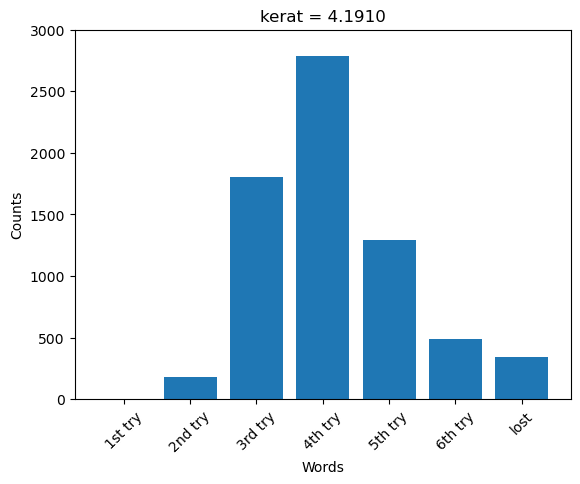

In [9]:
# kerat  =  4.1910911201392915
# lost =  341
# win rate =  0.9505223447475334
# 1st try =  1
# 2nd try =  180
# 3rd try =  1807
# 4th try =  2783
# 5th try =  1293
# 6th try =  487
# jumlah kata =  6892

words = ['1st try', '2nd try', '3rd try', '4th try', '5th try', '6th try','lost']
counts = [1, 180, 1807, 2783, 1293, 487, 341]

plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('kerat = 4.1910')
plt.ylim(0, 3000)
plt.xticks(rotation=45)
plt.show()


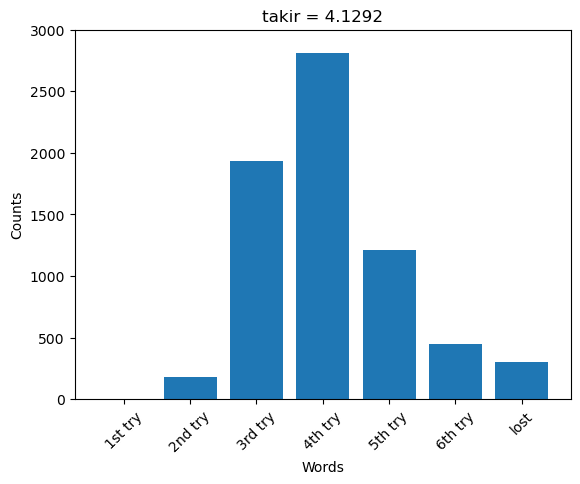

In [11]:
# takir  =  4.129280325014509
# lost =  304
# win rate =  0.9558908879860708
# 1st try =  1
# 2nd try =  182
# 3rd try =  1935
# 4th try =  2814
# 5th try =  1209
# 6th try =  447
# jumlah kata =  6892


words = ['1st try', '2nd try', '3rd try', '4th try', '5th try', '6th try','lost']
counts = [1, 182, 1935, 2814, 1209, 447, 304]

plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('takir = 4.1292')
plt.ylim(0, 3000)
plt.xticks(rotation=45)
plt.show()

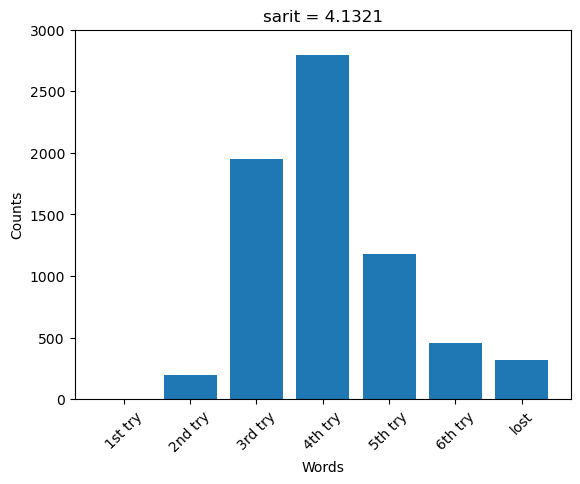

In [13]:
# sarit  =  4.132182240278584
# lost =  318
# win rate =  0.9538595473012188
# 1st try =  1
# 2nd try =  194
# 3rd try =  1947
# 4th try =  2795
# 5th try =  1181
# 6th try =  456
# jumlah kata =  6892


words = ['1st try', '2nd try', '3rd try', '4th try', '5th try', '6th try','lost']
counts = [1, 194, 1947, 2795, 1181, 456, 318]

plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('sarit = 4.1321')
plt.ylim(0, 3000)
plt.xticks(rotation=45)
plt.show()

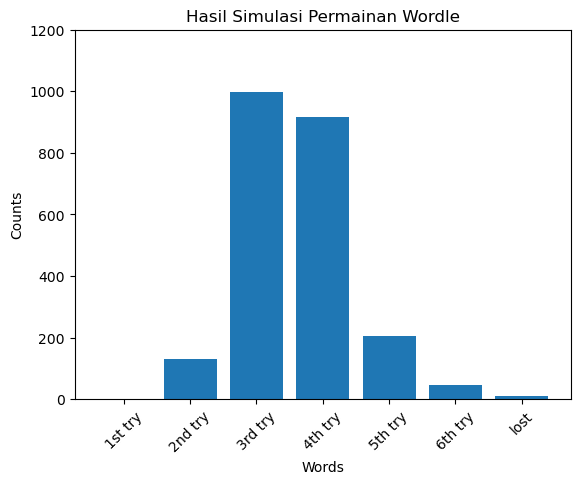

In [1]:
# raise  =  3.600259852750108
# lost =  12
# win rate =  0.9948029449978346
# 1st try =  1
# 2nd try =  131
# 3rd try =  996
# 4th try =  916
# 5th try =  206
# 6th try =  47
# jumlah kata =  2309

import matplotlib.pyplot as plt

words = ['1st try', '2nd try', '3rd try', '4th try', '5th try', '6th try','lost']
counts = [1, 131, 996, 916, 206, 47, 12]

plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Hasil Simulasi Permainan Wordle Dengan Kata : raise')
plt.ylim(0, 1200)
plt.xticks(rotation=45)
plt.show()

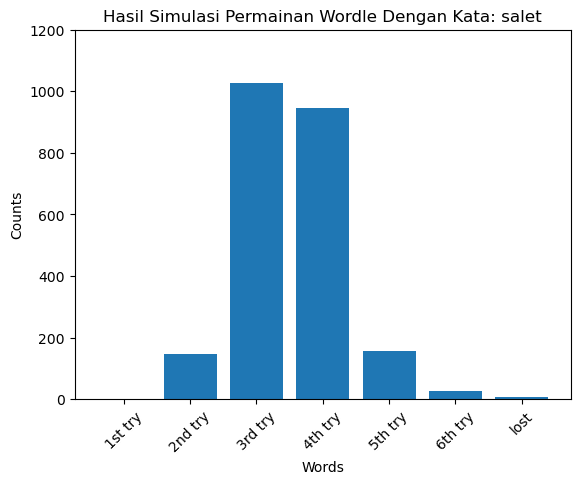

In [2]:
# salet  =  3.527934170636639
# lost =  8
# win rate =  0.996535296665223
# 1st try =  0
# 2nd try =  148
# 3rd try =  1027
# 4th try =  944
# 5th try =  156
# 6th try =  26

import matplotlib.pyplot as plt

words = ['1st try', '2nd try', '3rd try', '4th try', '5th try', '6th try','lost']
counts = [0, 148, 1027, 944, 156, 26, 8]

plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Hasil Simulasi Permainan Wordle Dengan Kata: salet')
plt.ylim(0, 1200)
plt.xticks(rotation=45)
plt.show()